# Overview

The VP of Product increased the price of XYZ's software from \\$39 to \\$59. I am interested in the following:

  1. Should we begin selling software for the increased price of \\$59?
  1. What are the actionable insights to increase conversion rate?
  1. What is the proper length to run this test?
  
Associated Google slides available [here](https://drive.google.com/open?id=1DpmUWTRw39XY9yCVPsP3Ul4oDrDzpPGnXpvWamb-CrA)  

## TODO (high priority)

  - [ ] 

## TODO (low priority)

  - [ ] time zone fix

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import scikitplot as skplt

import statsmodels
from statsmodels.stats import power

import sklearn
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

imports = [pd, np, sns, sklearn, statsmodels]
for pkg in imports:
    print(f'{pkg.__name__} is at version {pkg.__version__}.')

pandas is at version 0.24.2.
numpy is at version 1.16.2.
seaborn is at version 0.9.0.
sklearn is at version 0.20.3.
statsmodels is at version 0.9.0.


In [2]:
data_dir = '/home/amaurer/Documents/Data Challenge/data/pricing_test/'

user_file = 'user_table.csv'
results_file = 'test_results.csv'

users = pd.read_csv(data_dir + user_file)
test_results = pd.read_csv(data_dir + results_file)

In [3]:
users.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [4]:
test_results.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [5]:
test_results[pd.to_datetime(test_results.timestamp, infer_datetime_format=True, errors='coerce').isna()]

,user_id,timestamp,source,device,operative_system,test,price,converted
54,370914,2015-04-24 12:60:46,direct_traffic,mobile,android,0,39,0
104,549807,2015-04-24 11:60:20,friend_referral,mobile,iOS,0,39,0
121,107010,2015-03-14 12:60:02,direct_traffic,web,windows,0,39,0
278,287830,2015-04-04 02:23:60,direct_traffic,web,windows,1,59,0
282,676183,2015-05-11 12:60:53,ads-google,web,windows,1,59,0
287,641153,2015-04-26 11:60:44,direct_traffic,mobile,android,0,39,0
330,765772,2015-03-20 12:20:60,ads-yahoo,web,mac,0,39,0
361,842974,2015-04-10 07:42:60,ads-google,mobile,iOS,1,59,0
383,652221,2015-03-10 12:31:60,friend_referral,mobile,android,0,39,0
422,890062,2015-04-17 12:10:60,ads-bing,mobile,other,0,39,0


# Test Data Integrity

# Exploratory Data Analysis

## Where are Users and What Devices Do They Use?

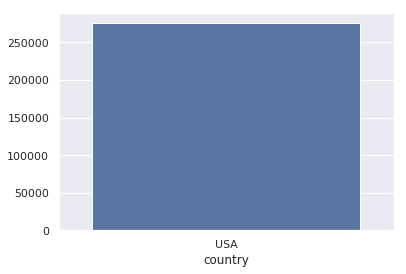

In [6]:
tmp_data = users.groupby(by='country').size()

sns.barplot(x=tmp_data.index, y=tmp_data.values)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

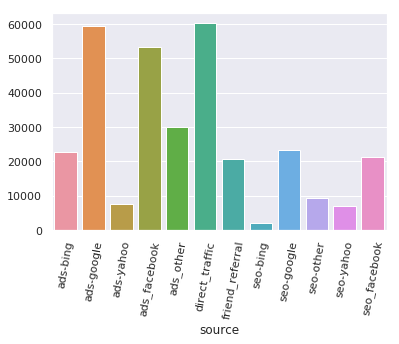

In [7]:
tmp_data = test_results.groupby(by='source').size()

sns.barplot(x=tmp_data.index, y=tmp_data.values)
plt.xticks(rotation=80)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

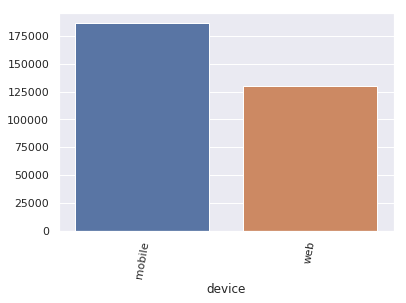

In [8]:
tmp_data = test_results.groupby(by='device').size()

sns.barplot(x=tmp_data.index, y=tmp_data.values)
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

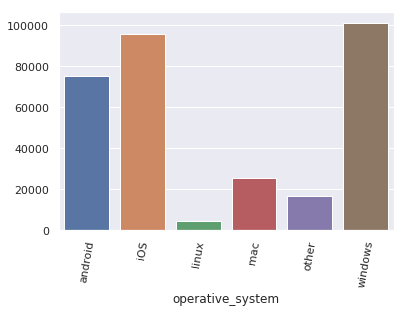

In [9]:
tmp_data = test_results.groupby(by='operative_system').size()

sns.barplot(x=tmp_data.index, y=tmp_data.values)
plt.xticks(rotation=80)

## Weighted Conversion Rates

A higher price will mean a lower conversion rate, but we are interested in whether revenue increases. The left-hand graph shows conversion rates among the \\$39 group, whereas the right-hand graph shows conversion rates scaled by a factor of \\$59/\\$39. This allows numbers to be compared apples-to-apples

In [13]:
test_results[test_results.test == 0].groupby(by=['source', 'converted']).size().unstack()

converted,0,1
source,,
ads-bing,14414,195
ads-google,37010,854
ads-yahoo,4737,81
ads_facebook,33292,807
ads_other,18987,297
direct_traffic,38234,525
friend_referral,12587,548
seo-bing,1294,40
seo-google,14837,265


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

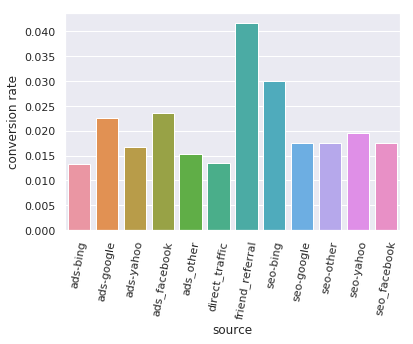

In [14]:
tmp1 = test_results[test_results.test == 0].groupby(by=['source', 'converted']).size().unstack()
tmp1['conversion rate'] = tmp1[1] / (tmp1[0] + tmp1[1])

sns.barplot(x=tmp1.index, y=tmp1['conversion rate'])
plt.xticks(rotation=80)

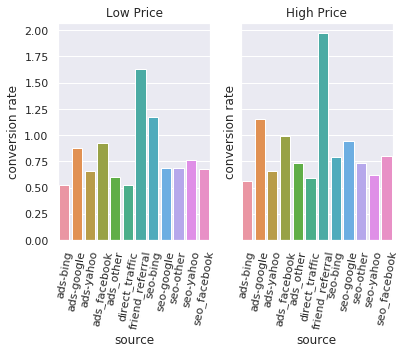

In [16]:
tmp1 = test_results[test_results.test == 0].groupby(by=['source', 'converted']).size().unstack()
tmp1['conversion rate'] = tmp1[1] / (tmp1[0] + tmp1[1]) * 39

tmp2 = test_results[test_results.test == 1].groupby(by=['source', 'converted']).size().unstack()
tmp2['conversion rate'] = tmp2[1] / (tmp2[0] + tmp2[1]) * 59

fig, ax =plt.subplots(1,2, sharey=True)
sns.barplot(x=tmp1.index, y=tmp1['conversion rate'], ax=ax[0])
sns.barplot(x=tmp2.index, y=tmp2['conversion rate'], ax=ax[1])

ax[0].set_title('Low Price')
ax[1].set_title('High Price')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=80)

Text(0.5, 1.0, 'Percentage Change')

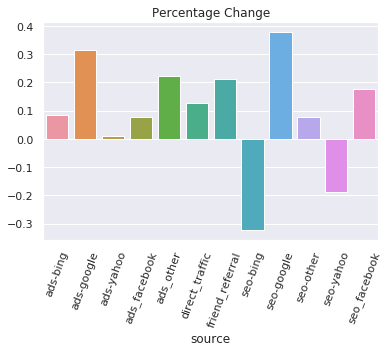

In [17]:
diffs = tmp2['conversion rate'] / tmp1['conversion rate'] - 1
diffs.sort_values(ascending=False)

sns.barplot(x=diffs.index, y=diffs.values)
plt.xticks(rotation=70)
plt.title('Percentage Change')

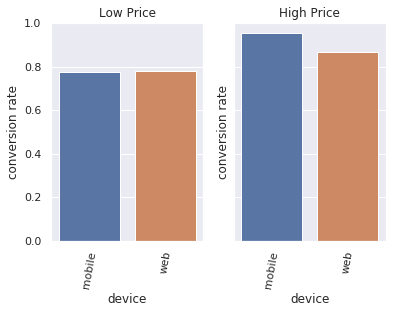

In [18]:
tmp1 = test_results[test_results.test == 0].groupby(by=['device', 'converted']).size().unstack()
tmp1['conversion rate'] = tmp1[1] / (tmp1[0] + tmp1[1]) * 39

tmp2 = test_results[test_results.test == 1].groupby(by=['device', 'converted']).size().unstack()
tmp2['conversion rate'] = tmp2[1] / (tmp2[0] + tmp2[1]) * 59

fig, ax =plt.subplots(1,2, sharey=True)
sns.barplot(x=tmp1.index, y=tmp1['conversion rate'], ax=ax[0])
sns.barplot(x=tmp2.index, y=tmp2['conversion rate'], ax=ax[1])

ax[0].set_title('Low Price')
ax[1].set_title('High Price')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=80)

Text(0.5, 1.0, 'Percentage Change')

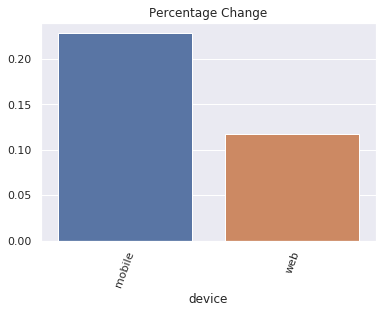

In [19]:
diffs = tmp2['conversion rate'] / tmp1['conversion rate'] - 1
diffs.sort_values(ascending=False)

sns.barplot(x=diffs.index, y=diffs.values)
plt.xticks(rotation=70)
plt.title('Percentage Change')

# A/B Test

I will run an A/B test as follows. Denote the conversion rate when selling the product for \\$39 by $p$, and the conversion rate when selling the product for \\$59 by $p'$. As is standard, I will require a significance level of $\alpha = 0.05$ and a power of $0.80$.

  - $H_0$: $p' = 39 \cdot p \ / \ 59$, i.e., there is no change in revenue after raising the price.
  - $H_a$: $p' = 1.05 \cdot 39 \cdot p \ / \ 59$, i.e., there was a 5% increase in revenue following the price hike.
  
After calculating the 

In [20]:
control_data = test_results[test_results.test == 0]
treatment_data = test_results[test_results.test == 1]

print(f'There are {test_results[test_results.test == 0].shape[0]} control.')
print(f'There are {test_results[test_results.test == 1].shape[0]} treatment.')

test_conversion = control_data.converted.sum() / control_data.shape[0]
treatment_conversion = treatment_data.converted.sum() / treatment_data.shape[0]
desired_conversion = test_conversion * 39 / 59 * 1.05

print(f'Control conversion rate : { test_conversion }')
print(f'Treatment conversion rate : { treatment_conversion } ')
print(f'5% increase             : { desired_conversion }')

There are 202727 control.
There are 114073 treatment.
Control conversion rate : 0.019903614220108817
Treatment conversion rate : 0.015542678810936857 
5% increase             : 0.013814457666329763


In [21]:
def normal(vec, mu=0, sig2=1):
    return np.exp( - ( vec - mu ) ** 2 / (2 * sig2 ) ) / ( 2 * np.pi * sig2 ) ** 0.5

def binom_var( p, n ):
    return p * (1-p) / n

In [ ]:
control_dist = normal( np.arange(0,0.025,0.0001), mu=test_conversion, sig2=binom_var(test_conversion, 202727))
treatment_dist = normal( np.arange(0,0.025,0.0001), mu=desired_conversion, sig2=binom_var( desired_conversion, 114073 ) )

sns.lineplot(x=np.arange(0,0.025,0.0001), y=control_dist, color='green')
sns.lineplot(x=np.arange(0,0.025,0.0001), y=treatment_dist, color='red')

In [ ]:
control_dist = normal( np.arange(0,0.025,0.0001), mu=test_conversion, sig2=binom_var(test_conversion, 202727))
treatment_dist = normal( np.arange(0,0.025,0.0001), mu=treatment_conversion, sig2=binom_var( treatment_conversion, 114073 ) )

sns.lineplot(x=np.arange(0,0.025,0.0001), y=control_dist, color='green')
sns.lineplot(x=np.arange(0,0.025,0.0001), y=treatment_dist, color='red')
sns.scatterplot(x=[desired_conversion], y=[0], color='black')